In [141]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import timeit

In [142]:
x_train = pd.read_csv('/kaggle/input/input-data/x_train.csv')
y_train = pd.read_csv('/kaggle/input/input-data/y_train.csv')
x_test = pd.read_csv('/kaggle/input/input-data/x_test.csv')
y_test = pd.read_csv('/kaggle/input/input-data/y_test.csv')

In [143]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 784)
y_train: (60000, 1)
x_test: (10000, 784)
y_test: (10000, 1)


In [144]:
df_X = pd.concat([x_train, x_test], axis=0)
print(df_X.shape)
df_y = pd.concat([y_train, y_test], axis=0)
print(df_y.shape)

(70000, 784)
(70000, 1)


In [145]:
x_train.count()

0      60000
1      60000
2      60000
3      60000
4      60000
       ...  
779    60000
780    60000
781    60000
782    60000
783    60000
Length: 784, dtype: int64

In [146]:
x_train.nunique()

0        6
1       16
2       26
3       64
4      106
      ... 
779    253
780    247
781    232
782    181
783     66
Length: 784, dtype: int64

In [147]:
x_train.shape

(60000, 784)

In [148]:
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)


In [149]:
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

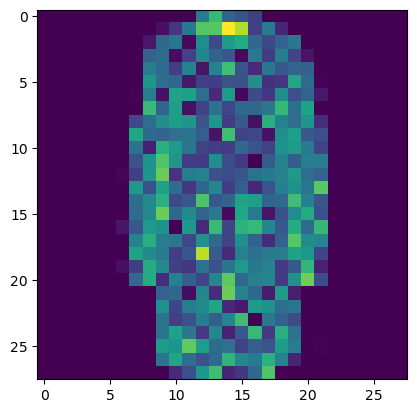

In [150]:
imgtest = x_train[9059].reshape((28,28))
plt.imshow(imgtest)
# plt.show()

### Classification with Convolutional Neural Networks
### Q1: Default Network

In [151]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding= "same", strides= (1,1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding= "same", strides= (1,1)))
model1.add(Flatten())
model1.add(Dense(5, activation='softmax'))
# compile model
model1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, verbose=1)

In [153]:
start = timeit.default_timer()
model1_fit = model1.fit(x_train, Y_train, validation_data=(x_test,Y_test), batch_size=64, epochs=40, callbacks=[es])
stop = timeit.default_timer()
execution_time_traindata = stop - start
print('Time taken to execute training data in seconds:',execution_time_traindata)
model1.summary()

Epoch 1/40
938/938 [==============================] - 5s 5ms/step - loss: 0.7077 - accuracy: 0.7184 - val_loss: 0.5918 - val_accuracy: 0.7741
Epoch 2/40
938/938 [==============================] - 5s 5ms/step - loss: 0.4653 - accuracy: 0.8270 - val_loss: 0.4985 - val_accuracy: 0.8077
Epoch 3/40
938/938 [==============================] - 5s 5ms/step - loss: 0.4081 - accuracy: 0.8510 - val_loss: 0.3958 - val_accuracy: 0.8543
Epoch 4/40
938/938 [==============================] - 5s 5ms/step - loss: 0.3776 - accuracy: 0.8636 - val_loss: 0.3785 - val_accuracy: 0.8604
Epoch 5/40
938/938 [==============================] - 4s 5ms/step - loss: 0.3558 - accuracy: 0.8722 - val_loss: 0.4134 - val_accuracy: 0.8431
Epoch 6/40
938/938 [==============================] - 4s 5ms/step - loss: 0.3385 - accuracy: 0.8803 - val_loss: 0.3482 - val_accuracy: 0.8747
Epoch 7/40
938/938 [==============================] - 5s 5ms/step - loss: 0.3246 - accuracy: 0.8851 - val_loss: 0.3332 - val_accuracy: 0.8796
Epoch 

In [154]:
# len(model1_fit.history['val_loss'])

In [155]:
#evaluate
loss, accuracy = model1.evaluate(x_test,Y_test)
print("Test loss: %.2f%%" %(loss*100))
print("Test accuracy: %.2f%%" %(accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.2203 - accuracy: 0.9219
Test loss: 22.03%
Test accuracy: 92.19%


### Q3: Results Analysis

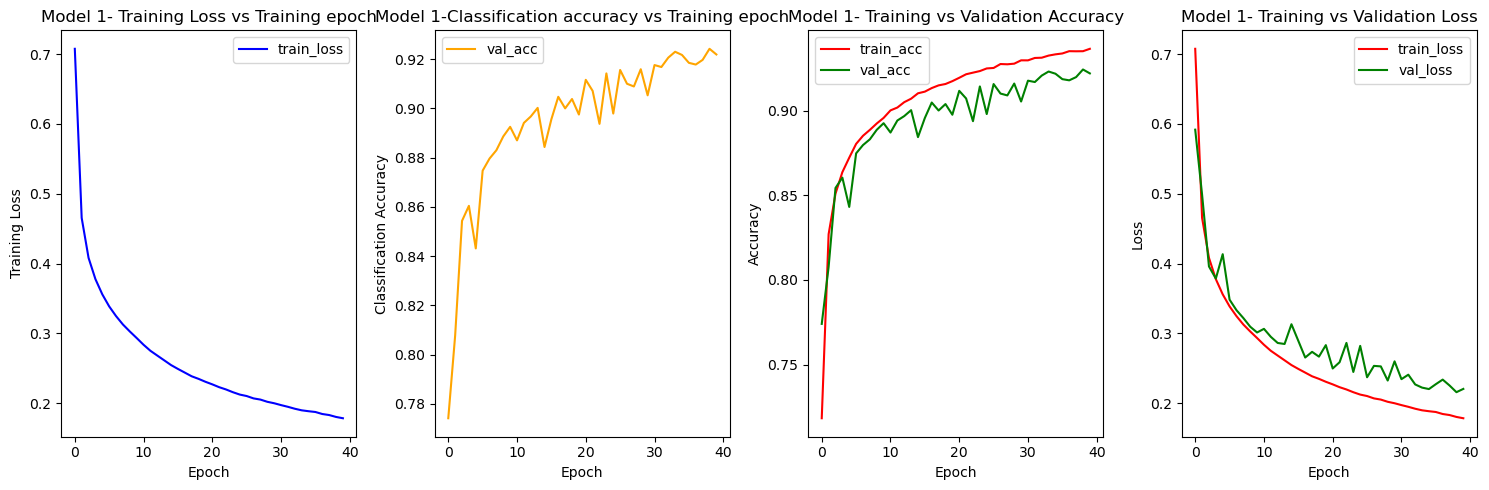

In [156]:
plt.figure(figsize=(15,5))


plt.subplot(141)
plt.title('Model 1- Training Loss vs Training epoch')
plt.plot(model1_fit.history['loss'], label='train_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('Model 1-Classification accuracy vs Training epoch')
plt.plot(model1_fit.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('Model 1- Training vs Validation Accuracy')
plt.plot(model1_fit.history['accuracy'], label='train_acc', color='red')
plt.plot(model1_fit.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('Model 1- Training vs Validation Loss')
plt.plot(model1_fit.history['loss'], label='train_loss', color='red')
plt.plot(model1_fit.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()

### Q2: Your Own Network

In [157]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(5, activation='softmax'))
# compile model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [158]:
start = timeit.default_timer()
model2_fit = model2.fit(x_train, Y_train, validation_data=(x_test,Y_test), batch_size=32,epochs=40)
stop = timeit.default_timer()
execution_time_traindata = stop - start
print('Time taken to execute training data in seconds:',execution_time_traindata)
model2.summary()

Epoch 1/40


2023-04-09 01:35:54.530924: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5319 - accuracy: 0.7918 - val_loss: 0.3336 - val_accuracy: 0.8727
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3482 - accuracy: 0.8730 - val_loss: 0.2664 - val_accuracy: 0.9039
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3001 - accuracy: 0.8919 - val_loss: 0.2469 - val_accuracy: 0.9055
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2731 - accuracy: 0.9025 - val_loss: 0.2150 - val_accuracy: 0.9231
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2586 - accuracy: 0.9063 - val_loss: 0.2084 - val_accuracy: 0.9236
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2477 - accuracy: 0.9120 - val_loss: 0.1992 - val_accuracy: 0.9272
Epoch 7/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2385 - accuracy: 0.9147 - val_loss: 0.1966 - val_accuracy: 0.9

In [159]:
loss, accuracy = model2.evaluate(x_test,Y_test)
# print(loss, accuracy)
print("Test loss: %.2f%%" %(loss*100))
print("Test accuracy: %.2f%%" %(accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.9393
Test loss: 16.59%
Test accuracy: 93.93%


### Q3: Results Analysis

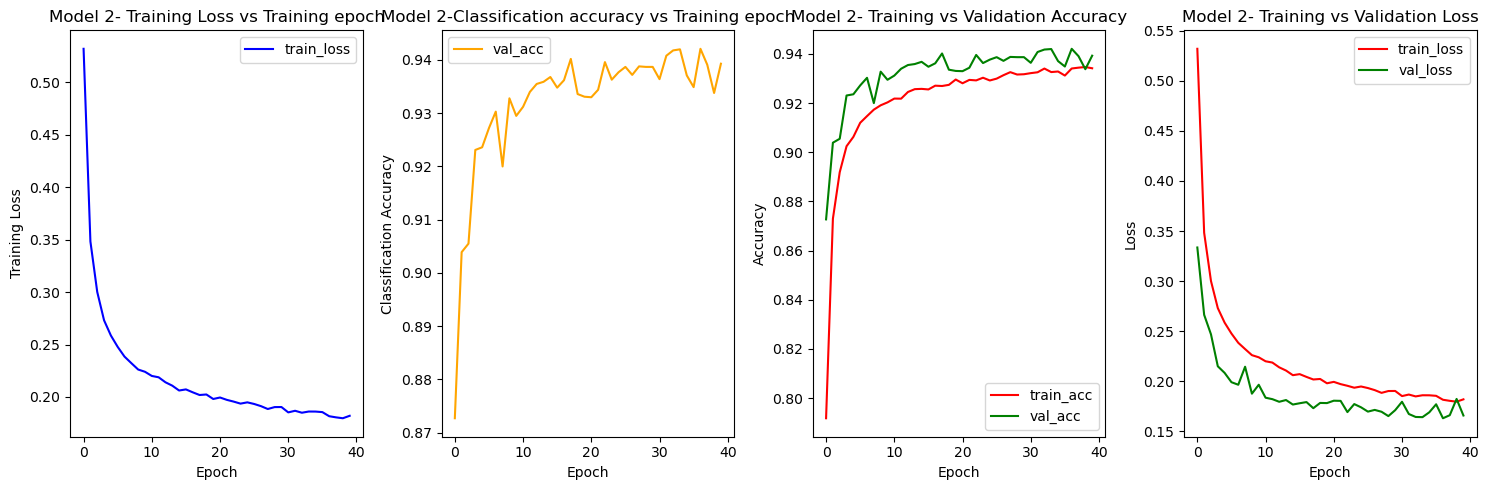

In [160]:
plt.figure(figsize=(15,5))


plt.subplot(141)
plt.title('Model 2- Training Loss vs Training epoch')
plt.plot(model2_fit.history['loss'], label='train_loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()


plt.subplot(142)
plt.title('Model 2-Classification accuracy vs Training epoch')
plt.plot(model2_fit.history['val_accuracy'], label='val_acc', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Classification Accuracy')
plt.legend()

plt.subplot(143)
plt.title('Model 2- Training vs Validation Accuracy')
plt.plot(model2_fit.history['accuracy'], label='train_acc', color='red')
plt.plot(model2_fit.history['val_accuracy'], label='val_acc', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(144)
plt.title('Model 2- Training vs Validation Loss')
plt.plot(model2_fit.history['loss'], label='train_loss', color='red')
plt.plot(model2_fit.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()

### Q4: Using Your Own Encoding

In [161]:
from sklearn.decomposition import PCA
import seaborn as sns

In [162]:
import keras
enc_model = keras.Model(model2.layers[0].input, model2.layers[9].output)

In [163]:
enc_model

In [164]:
X_encoding = enc_model(x_test)
X_encoding.shape

TensorShape([10000, 32])

In [165]:
# perform PCA
pca = PCA(n_components=2, random_state=27)
pca.fit(X_encoding)
pca.explained_variance_

array([214.95672411, 159.67550726])

In [166]:
X_pca = pca.transform(X_encoding)

[]

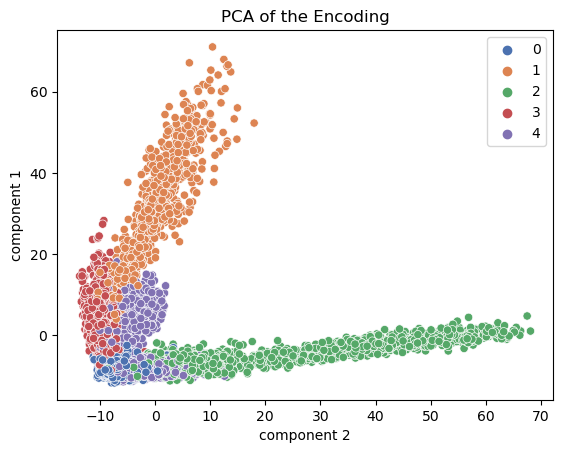

In [167]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_test.values.flatten(), palette="deep")
plt.title('PCA of the Encoding')
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.plot()

In [168]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE

In [169]:
kmeans = KMeans(n_clusters=5, random_state=27).fit(X_encoding)
kmeans.labels_.shape

(10000,)

[]

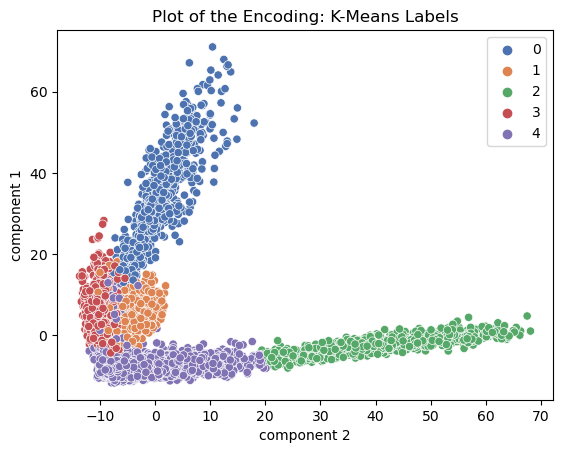

In [170]:
# Use the k-means labels for the PCA visualization
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette="deep")
plt.title('Plot of the Encoding: K-Means Labels')
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.plot()

In [195]:
# DBSCAN Clustering
clustering = DBSCAN(eps=53, min_samples=165).fit(X_encoding)
np.unique(clustering.labels_, return_counts=True)

(array([0]), array([10000]))

[]

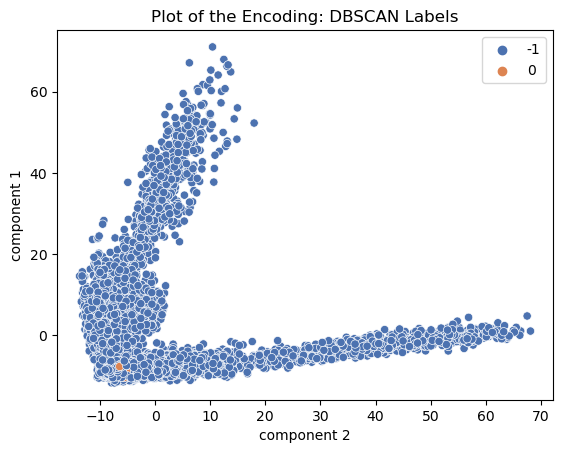

In [172]:
# Use the DBSCAN labels for the PCA visualization
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clustering.labels_, palette="deep")
plt.title('Plot of the Encoding: DBSCAN Labels')
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.plot()

In [173]:
# T-SNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', random_state=27).fit_transform(X_encoding)
X_embedded.shape

(10000, 2)

[]

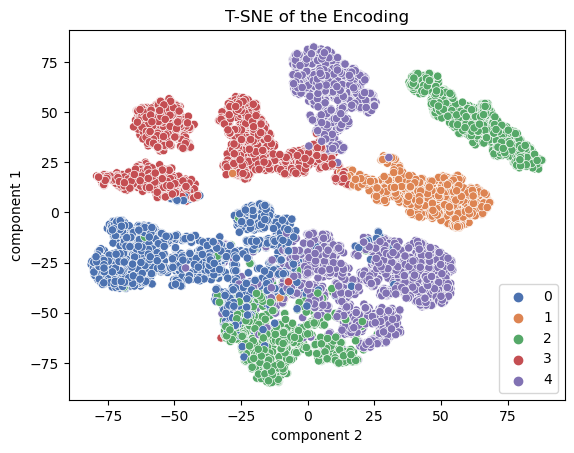

In [174]:
# T-SNE visualization
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_test.values.flatten(), palette="deep")
plt.title('T-SNE of the Encoding')
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.plot()

In [175]:
x_test_subset = x_test
y_test_subset = kmeans.labels_

x_test_subset = x_test_subset.reshape((-1, 28, 28))

print("x_test_subset shape:", x_test_subset.shape)
#print("y_test_subset shape:", y_test_subset.shape)

x_class_0 = np.array(x_test_subset[y_test_subset == 0])
x_class_1 = np.array(x_test_subset[y_test_subset == 1])
x_class_2 = np.array(x_test_subset[y_test_subset == 2])
x_class_3 = np.array(x_test_subset[y_test_subset == 3])
x_class_4 = np.array(x_test_subset[y_test_subset == 4])

x_test_subset shape: (10000, 28, 28)


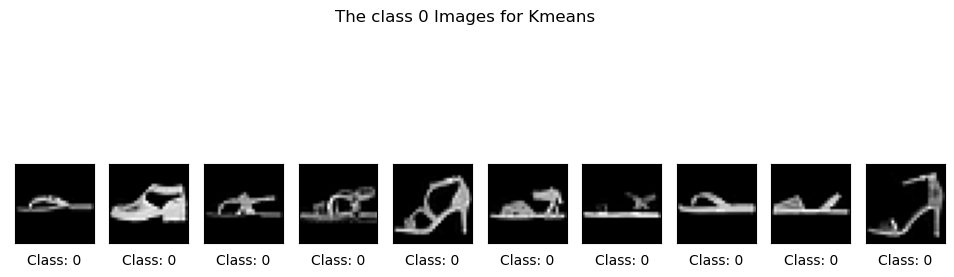

In [176]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_0[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 0')

fig.suptitle('The class 0 Images for Kmeans')
plt.show()

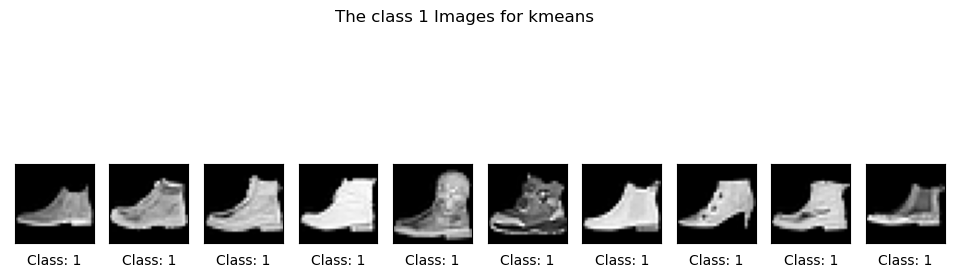

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_1[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 1')

fig.suptitle('The class 1 Images for kmeans')
plt.show()

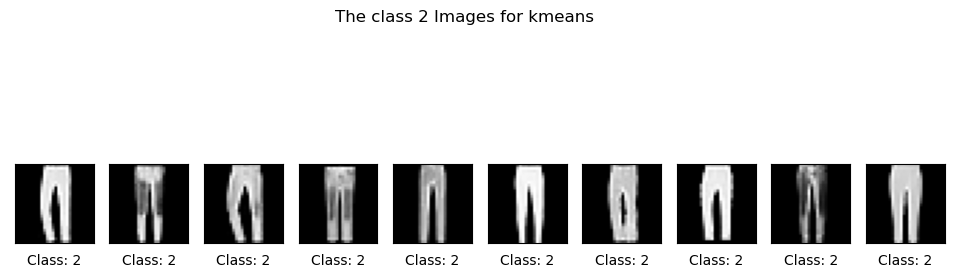

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_2[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 2')

fig.suptitle('The class 2 Images for kmeans')
plt.show()

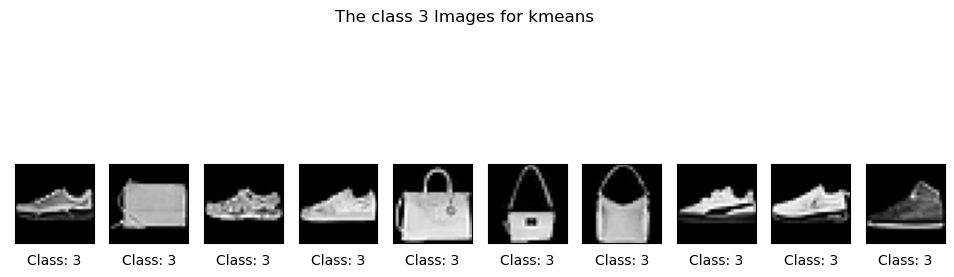

In [179]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_3[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 3')

fig.suptitle('The class 3 Images for kmeans')
plt.show()

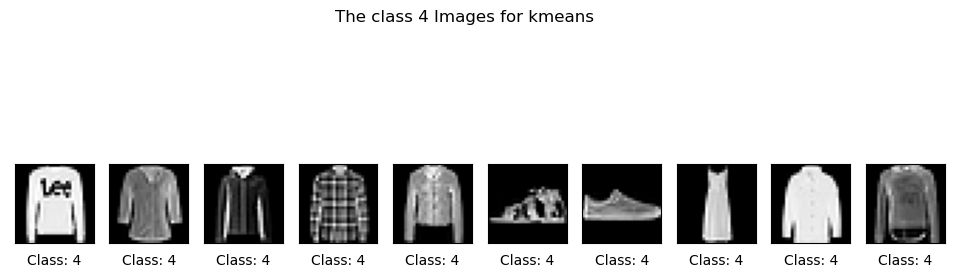

In [180]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(12,4))
for i in range(10):
    ax[i].imshow(x_class_4[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 4')

fig.suptitle('The class 4 Images for kmeans')
plt.show()


In [181]:
x_class_0 = np.mean(x_test_subset[y_test_subset == 0], axis=0)
x_class_1 = np.mean(x_test_subset[y_test_subset == 1], axis=0)
x_class_2 = np.mean(x_test_subset[y_test_subset == 2], axis=0)
x_class_3 = np.mean(x_test_subset[y_test_subset == 3], axis=0)
x_class_4 = np.mean(x_test_subset[y_test_subset == 4], axis=0)

x_class = np.array([x_class_0, x_class_1, x_class_2, x_class_3, x_class_4])
x_class.shape

(5, 28, 28)

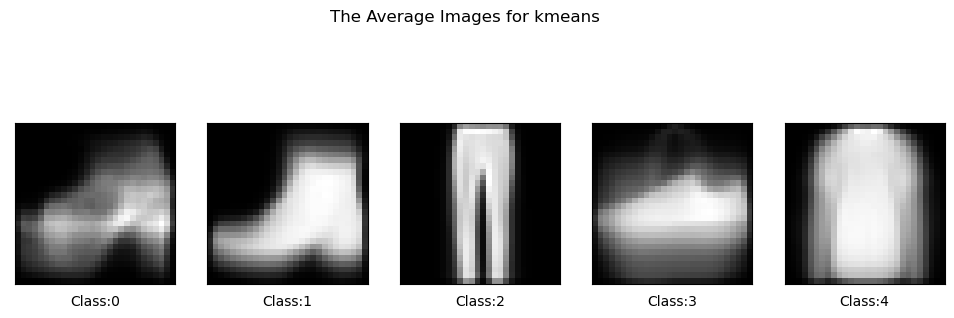

In [182]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class:'+ str(i))

fig.suptitle('The Average Images for kmeans')
plt.show()

In [183]:
mapping = {k:[] for k in range(5)}
for mystery, actual in zip(y_test.values.flatten(), X_embedded.flatten()):
  if actual not in mapping[mystery]:
    mapping[mystery].append(actual)

In [184]:
mapping.values


<function dict.values>

In [185]:
# counting how many samples of each mystery class are present in our test set
counts = {k: 0 for k in range(5)}

for label in y_test.values.flatten():
    counts[label] += 1

In [186]:
counts


{0: 2000, 1: 1000, 2: 2000, 3: 2000, 4: 3000}

In [187]:
# Let's plot the class of images 
x_test_subset = x_test
y_test_subset = y_test.values.flatten()

x_test_subset = x_test_subset.reshape((-1, 28, 28))

print("x_test_subset shape:", x_test_subset.shape)
print("y_test_subset shape:", y_test_subset.shape)

x_class_0 = np.array(x_test_subset[y_test_subset == 0])
x_class_1 = np.array(x_test_subset[y_test_subset == 1])
x_class_2 = np.array(x_test_subset[y_test_subset == 2])
x_class_3 = np.array(x_test_subset[y_test_subset == 3])
x_class_4 = np.array(x_test_subset[y_test_subset == 4])

x_test_subset shape: (10000, 28, 28)
y_test_subset shape: (10000,)


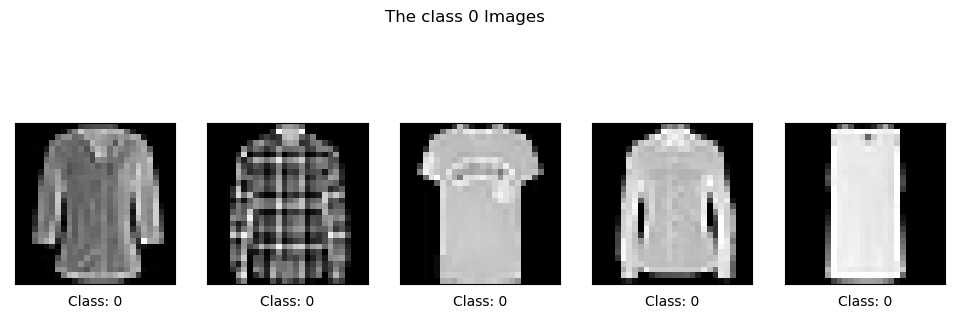

In [188]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class_0[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 0')

fig.suptitle('The class 0 Images')
plt.show()

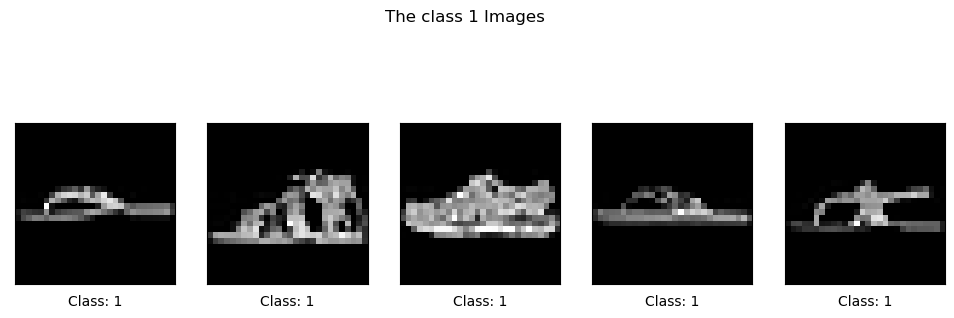

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class_1[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 1')

fig.suptitle('The class 1 Images')
plt.show()

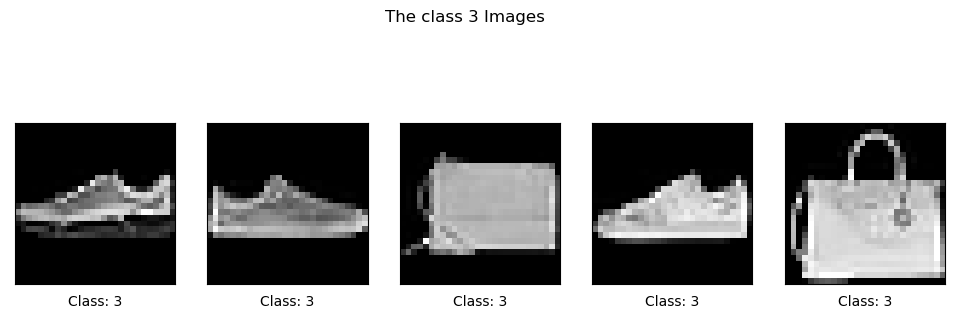

In [190]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class_3[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 3')

fig.suptitle('The class 3 Images')
plt.show()

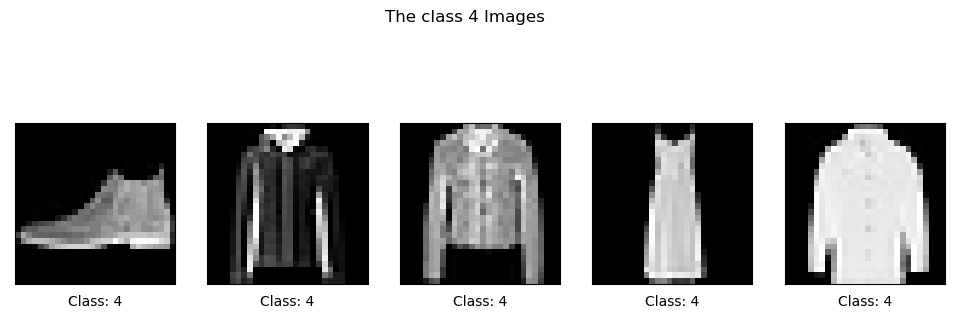

In [191]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class_4[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class: 4')

fig.suptitle('The class 4 Images')
plt.show()

In [192]:
# Let's plot the average of images 
x_test_subset = x_test
y_test_subset = y_test.values.flatten()

x_test_subset = x_test_subset.reshape((-1, 28, 28))

print("x_test_subset shape:", x_test_subset.shape)
print("y_test_subset shape:", y_test_subset.shape)

x_class_0 = np.mean(x_test_subset[y_test_subset == 0], axis=0)
x_class_1 = np.mean(x_test_subset[y_test_subset == 1], axis=0)
x_class_2 = np.mean(x_test_subset[y_test_subset == 2], axis=0)
x_class_3 = np.mean(x_test_subset[y_test_subset == 3], axis=0)
x_class_4 = np.mean(x_test_subset[y_test_subset == 4], axis=0)

x_test_subset shape: (10000, 28, 28)
y_test_subset shape: (10000,)


In [193]:
x_class = np.array([x_class_0, x_class_1, x_class_2, x_class_3, x_class_4])
x_class.shape

(5, 28, 28)

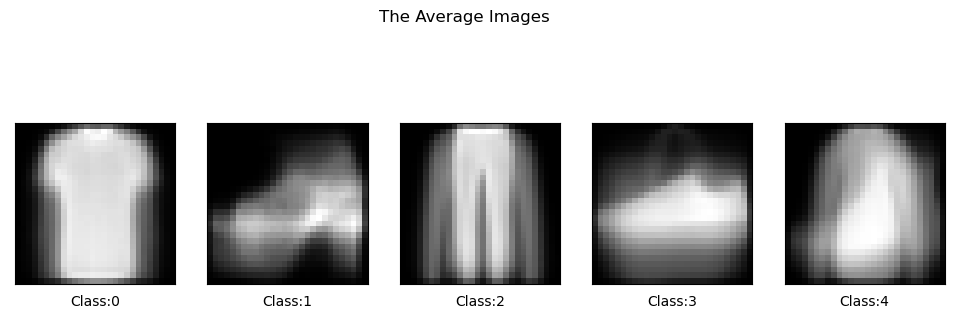

In [194]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))
for i in range(5):
    ax[i].imshow(x_class[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_xlabel('Class:'+ str(i))

fig.suptitle('The Average Images')
plt.show()